# Project: Medical Appointment No Show Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

My project is about a Medical Appointment No Show data set analyses. It is about patient showing to thier appointments or not.  
## Data Dictionary:

### 01 - PatientId
* Identification of a patient.  
### 02 - AppointmentID  
* Identification of each appointment.  
### 03 - Gender  
* Male or Female.  
### 04 - ScheduledDay	 
* The day someone called or registered the appointment.
### 05 - AppointmentDay  
* The day of the actuall appointment, when they have to visit the doctor.  
### 06 - Age  
* How old is the patient.  
### 07 - Neighbourhood  
* Where the appointment takes place.  
### 08 - Scholarship  
* Patient has a scolarship(1) or not(0).
### 09 - Hipertension  
* Patient diagnosed with hipertension(1) or not(0). 
### 10 - Diabetes  
* Patient diagnosed with diabetes(1) or not(0).  
### 11 - Alcoholism  
* Patient is alcoholism(1) or not(0).  
### 12 - Handcap  
* Patient is handcap(1) or not(0).  
### 13 - SMS_received  
* Patient received SMS message(1) or not(0).  
### 14 - No-show  
* Patient missed the appointment(1) or not(0)  

## Questions I'll be answering will be:  
#### 1- Which gender tends to miss appointments more?  
#### 2- Does elderly people adhere more to appintments?  
#### 3- Does paitients with diagnoses adhere more?  
#### 4- Does schalorship affect?  
#### 5- Does recieving SMS message help people adhere?  

To start I'll import needed packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

### Data Cleaning 

**First** I'll load the data and view First 5 row just to see how it's structured.

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Now** I want to see if the dataset has any NULL values or wrong data types.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Good it seems that there is no NULL values, but the ScheduledDay & AppointmentDay are of type object, but that's not a problem since I'll not be using them.

**Next** I'll see some statistics about the data to find out if there is any thing unconvenient.

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


It seems that there is a patient with "-1" age which is wrong, so i'll just drop it since it's only one patient.

In [6]:
df.drop([99832], inplace=True)

I'll check if every thing is good now.

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172538e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438960e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Now** droping the columes that I don't need.

In [8]:
df.drop(axis=1, labels=['AppointmentID','ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Alcoholism', 'Handcap'], inplace=True)

Check.

In [9]:
df.head(1)

,PatientId,Gender,Age,Scholarship,Hipertension,Diabetes,SMS_received,No-show
0,2.987250e+13,F,62,0,1,0,0,No


**Finally** I'll change 'No-show' to 'No_show' to make it easier to deal with.

In [10]:
df.rename(columns={'No-show':'No_show'}, inplace=True)

Check.

In [11]:
df.head(1)

,PatientId,Gender,Age,Scholarship,Hipertension,Diabetes,SMS_received,No_show
0,2.987250e+13,F,62,0,1,0,0,No


That seems good now since all remaining data will be usfull for answering my quistions.

<a id='eda'></a>
## Exploratory Data Analysis

### Q1 Which gender tends to miss appointments more?  

**First** I'll have the patients that did not show up assignd to a variable since all my quistions are about them.

In [12]:
noShow = df[df['No_show'] == 'Yes']

**Then** I'll make a variable for each gender to see if one gender has more records then the other.

In [13]:
all_male = len(df[df['Gender'] == "M"])
all_female = len(df[df['Gender'] == "F"])
all_female, all_male

(71839, 38687)

It seems the number of records of females is way more than males. That's why I'll be using % for all of my statistics.

**Now** I'll get the number of patients who missed the appointment for each gender, and assign their values to a variable.

In [14]:
noShow_M = len(noShow.query('Gender == "M"'))
noShow_F = len(noShow.query('Gender == "F"'))
noShow_F, noShow_M

(14594, 7725)

**Then** get the propability for each gender since number of Females are larger.

In [15]:
prop_M = noShow_M / len(df[df['Gender'] == "M"]) * 100
prop_F = noShow_F / len(df[df['Gender'] == "F"]) * 100
prop_F, prop_M

(20.314870752655242, 19.967947889471915)

**Then** a graph to view my findings. 

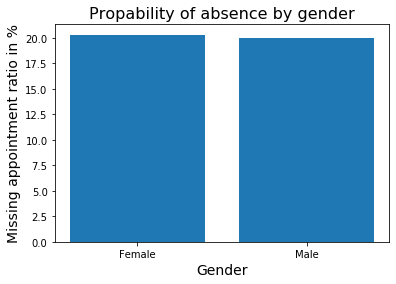

In [16]:
plt.bar(['Female', 'Male'], [prop_F, prop_M])
plt.title('Propability of absence by gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Missing appointment ratio in %', fontsize=14);

It seems that gender doesn't affect the attendance rate.

### Q2 Does elderly people adher more to appintments?

**First** I'll catigorize parients by age.

In [17]:
f0_20 = len(noShow[noShow['Age'] < 20])
f20_40 = len(noShow[(noShow['Age'] >= 20) & (noShow['Age'] < 40)])
f40_60 = len(noShow[(noShow['Age'] >= 40) & (noShow['Age'] < 60)])
f60_80 = len(noShow[(noShow['Age'] >= 60) & (noShow['Age'] < 80)])
f80 = len(noShow[(noShow['Age'] >= 80)])

**Then** I'll get the propability of missing the appointment for all the age catigories. And assign it to variables.

In [18]:
f0_20_prop = f0_20 / len(df[df['Age'] < 20]) * 100
f20_40_prop = f20_40 / len(df[(df['Age'] >= 20) & (df['Age'] < 40)]) * 100
f40_60_prop = f40_60 / len(df[(df['Age'] >= 40) & (df['Age'] < 60)]) * 100
f60_80_prop = f60_80 / len(df[(df['Age'] >= 60) & (df['Age'] < 80)]) * 100
f80_prop = f80 / len(df[(df['Age'] >= 80)]) * 100
f0_20_prop, f20_40_prop, f40_60_prop, f60_80_prop, f80_prop

(22.16632139686298,
 23.138205749913404,
 18.808193668528865,
 15.11510387422796,
 16.354445435622956)

**And now** I'll visualize the data.

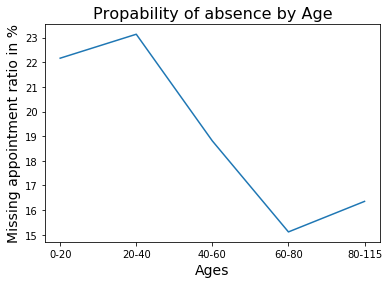

In [19]:
labels= ['0-20', '20-40', '40-60', '60-80', '80-115']
data = [f0_20_prop, f20_40_prop, f40_60_prop, f60_80_prop, f80_prop]
plt.plot(labels, data)
plt.title('Propability of absence by Age', fontsize=16)
plt.xlabel('Ages', fontsize=14)
plt.ylabel('Missing appointment ratio in %', fontsize=14);

It seems that the older the patient is, the more he adhere to his appointments. The ages from 60 to 80 has the highst rate of showing to appointments, in the other hand the ages from 20-40 are the least, where around 23% of them do not show in appointments.

### Q3 Does paitients with diagnoses adhere more?

**First** I'll categorize the patients by number of diagnoses.

In [20]:
# All patients
no_diag = len(df[(df['Hipertension'] == 0) & (df['Diabetes'] == 0)])

one_diag = len(df[((df['Hipertension'] == 1) & (df['Diabetes'] == 0)) | 
              ((df['Hipertension'] == 0) & (df['Diabetes'] == 1))])

two_diag = len(df[(df['Hipertension'] == 1) & (df['Diabetes'] == 1)])


# Paitients that did not show
noS_no_diag = len(noShow[(noShow['Hipertension'] == 0) & (noShow['Diabetes'] == 0)])

noS_one_diag = len(noShow[((noShow['Hipertension'] == 1) & (noShow['Diabetes'] == 0)) | 
              ((noShow['Hipertension'] == 0) & (noShow['Diabetes'] == 1))])

noS_two_diag = len(noShow[(noShow['Hipertension'] == 1) & (noShow['Diabetes'] == 1)])

**Then** I'll get the propability of missing the appointment for all catigories. And assign it to variables.

In [21]:
no_diag_prop = noS_no_diag / no_diag * 100
one_diag_prop = noS_one_diag / one_diag * 100
two_diag_prop = noS_two_diag / two_diag * 100
no_diag_prop, one_diag_prop, two_diag_prop

(20.921758261905854, 17.409968995945626, 17.59173604687018)

**Now** visualization.

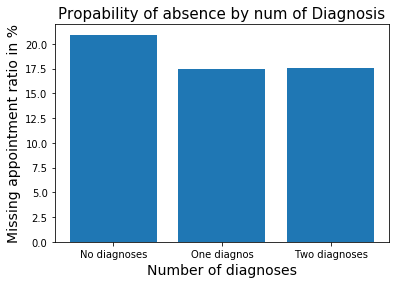

In [22]:
labels=['No diagnoses', 'One diagnos', 'Two diagnoses']
data = [no_diag_prop, one_diag_prop, two_diag_prop]
plt.bar(labels, data)
plt.title('Propability of absence by num of Diagnosis', fontsize=15)
plt.xlabel('Number of diagnoses', fontsize=14)
plt.ylabel('Missing appointment ratio in %', fontsize=14);

We can see here that people with diagnoses have less propability of missing an appiontment. Although there is no difference if the patient is diagnosed with one or two diagnoses.

### Q4 Does schalorship affect?

**First** I'll categorize patients by scholarship.

In [23]:
has_sch = len(df[df['Scholarship'] == 1])
nhas_sch = len(df[df['Scholarship'] == 0])

**Then** get the propability of missing the appointment.

In [24]:
has_sch_prop = len(noShow[noShow['Scholarship'] == 1]) / has_sch * 100
nhas_sch_prop = len(noShow[noShow['Scholarship'] == 0]) / nhas_sch * 100
has_sch_prop, nhas_sch_prop

(23.73630420771568, 19.807354638037424)

**And** visualize the result.

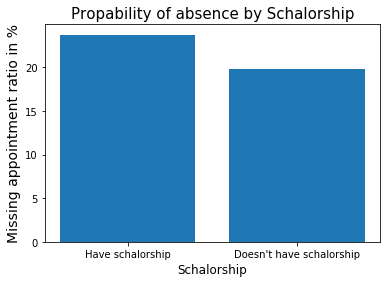

In [25]:
labels = ['Have schalorship', 'Doesn\'t have schalorship']
data = [has_sch_prop, nhas_sch_prop]
plt.bar(labels, data)
plt.title('Propability of absence by Schalorship', fontsize=15)
plt.xlabel('Schalorship', fontsize=12)
plt.ylabel('Missing appointment ratio in %', fontsize=14);

As we see in the graph, people who own a shalorship tend to miss appointments more.

### Q5 Does recieving SMS message help people adher?

**First** categorize patients by reseiving SMS or not.

In [26]:
rec_SMS = df[df['SMS_received'] == 1]
nrec_SMS = df[df['SMS_received'] == 0]

**Then** get the propability for each.

In [27]:
rec_SMS_prop = len(noShow[noShow['SMS_received'] == 1]) / len(rec_SMS) * 100
nrec_SMS_prop = len(noShow[noShow['SMS_received'] == 0]) / len(nrec_SMS) * 100
rec_SMS_prop, nrec_SMS_prop

(27.574544839637, 16.703533926762965)

**Now** visualize the result.

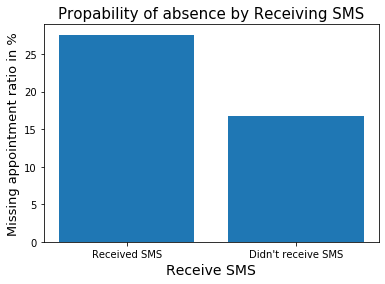

In [28]:
labels = ['Received SMS', 'Didn\'t receive SMS']
data = [rec_SMS_prop, nrec_SMS_prop]
plt.bar(labels, data)
plt.title('Propability of absence by Receiving SMS', fontsize=15)
plt.xlabel('Receive SMS', fontsize= 14)
plt.ylabel('Missing appointment ratio in %', fontsize= 13);

hmmm that's weard, we see that people who receives SMS tend to miss appointments more than people who didn't.

That made me thing if patients who has a scholarship are more adhere than those who doesn't have, when they recieve an SMS.  
**Let's find out**

I'll do the same steps as before.

In [29]:
sc_sms_prop = len(rec_SMS[rec_SMS['Scholarship'] == 1]) / len(rec_SMS) * 100
sc_nsms_prop = len(nrec_SMS[nrec_SMS['Scholarship'] == 1]) / len(nrec_SMS) * 100
sc_sms_prop, sc_nsms_prop

(9.87824812581027, 9.802249347049731)

In [30]:
nsc_sms_prop = len(rec_SMS[rec_SMS['Scholarship'] == 0]) / len(rec_SMS) * 100
nsc_nsms_prop = len(nrec_SMS[nrec_SMS['Scholarship'] == 0]) / len(nrec_SMS) * 100
nsc_sms_prop,  nsc_nsms_prop

(90.12175187418973, 90.19775065295028)

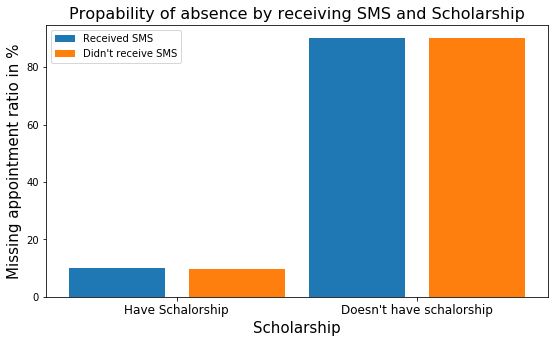

In [31]:
plt.subplots(figsize=(9,5))
plt.bar([1, 3], [sc_sms_prop, nsc_sms_prop], label='Received SMS')
plt.bar([2, 4], [sc_nsms_prop, nsc_nsms_prop], label='Didn\'t receive SMS')
plt.title('Propability of absence by receiving SMS and Scholarship', fontsize=16)
plt.xticks([1.5,3.5], ('Have Schalorship', 'Doesn\'t have schalorship'), fontsize=12)
plt.xlabel('Scholarship', fontsize=15)
plt.ylabel('Missing appointment ratio in %', fontsize=15)
plt.legend();

We see that people with no scholership tend to miss appointments way more than who does have a scholership when they receive a SMS message. 

<a id='conclusions'></a>
## Conclusions

### Limitations:  
* Age has values as '0', I assumed they were infants.  

### Questions answers:  
#### 1- Gender doesn't affect the ratio of  missing appointments.  
#### 2- Yes, the older the patient the more he/she adhere to appointments.  
#### 3- Yes, patients with one or more diagnoses tend to adhere more.  
#### 4- Yes, patients with scholership tend to miss more appointments.  
#### 5- No, patients who receive messages tend to miss more appointments!   